In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [21]:
df = pd.read_csv("datasets/udemy_courses.csv")
df.head(3)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance


In [22]:
df.shape

(3678, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [24]:
df.isna().sum() 

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [25]:
df.describe(include='all')

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
count,3.678000e+03,3678,3678,3678,3678.000000,3678.000000,3678.000000,3678.000000,3678,3678.000000,3678,3678
unique,NaN,3663,3672,2,NaN,NaN,NaN,NaN,4,NaN,3672,4
top,NaN,Acoustic Blues Guitar Lessons,https://www.udemy.com/cfa-level-2-quantitative...,True,NaN,NaN,NaN,NaN,All Levels,NaN,2017-07-02T14:29:35Z,Web Development
freq,NaN,3,2,3368,NaN,NaN,NaN,NaN,1929,NaN,2,1200
mean,6.759720e+05,NaN,NaN,NaN,66.049483,3197.150625,156.259108,40.108755,NaN,4.094517,NaN,NaN
std,3.432732e+05,NaN,NaN,NaN,61.005755,9504.117010,935.452044,50.383346,NaN,6.053840,NaN,NaN
min,8.324000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,4.076925e+05,NaN,NaN,NaN,20.000000,111.000000,4.000000,15.000000,NaN,1.000000,NaN,NaN
50%,6.879170e+05,NaN,NaN,NaN,45.000000,911.500000,18.000000,25.000000,NaN,2.000000,NaN,NaN
75%,9.613555e+05,NaN,NaN,NaN,95.000000,2546.000000,67.000000,45.750000,NaN,4.500000,NaN,NaN


### Check For Duplicate Data and Drop Them

In [26]:
df.duplicated().sum()   

6

In [27]:
df.drop_duplicates(inplace=True, keep='first')


### Find Out Number of Courses Per Subjects

In [29]:
df["subject"].value_counts()

subject
Web Development        1199
Business Finance       1191
Musical Instruments     680
Graphic Design          602
Name: count, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, 'Business Finance'),
  Text(1, 0, 'Graphic Design'),
  Text(2, 0, 'Musical Instruments'),
  Text(3, 0, 'Web Development')])

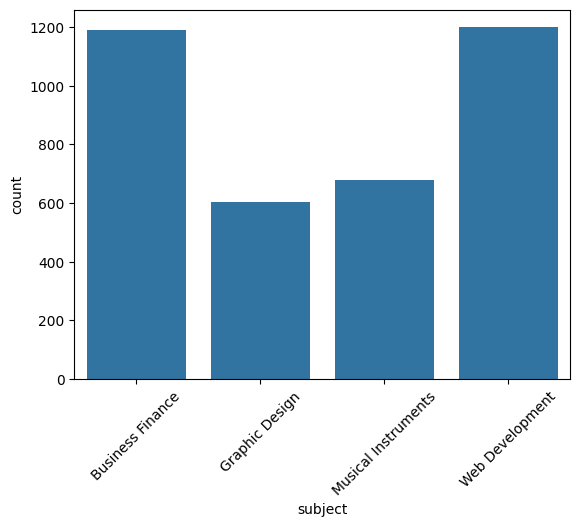

In [36]:
sns.countplot(x = "subject", data = df)     
plt.xticks(rotation=45)


### For Which Levels, Udemy Courses Providing The Courses

In [34]:
df["level"].value_counts()

level
All Levels            1925
Beginner Level        1268
Intermediate Level     421
Expert Level            58
Name: count, dtype: int64

<Axes: xlabel='level', ylabel='count'>

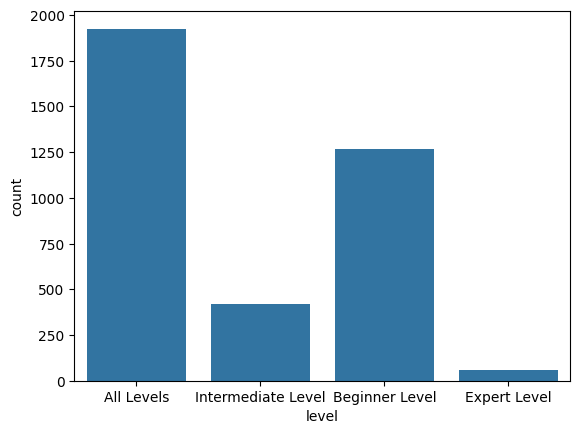

In [35]:
sns.countplot(x = "level", data = df)

###  Subscribers by level of courses

In [45]:
x = df.groupby("level")["num_subscribers"].size().reset_index(name="count")
x

,level,count
0,All Levels,1925
1,Beginner Level,1268
2,Expert Level,58
3,Intermediate Level,421


<Axes: xlabel='level', ylabel='count'>

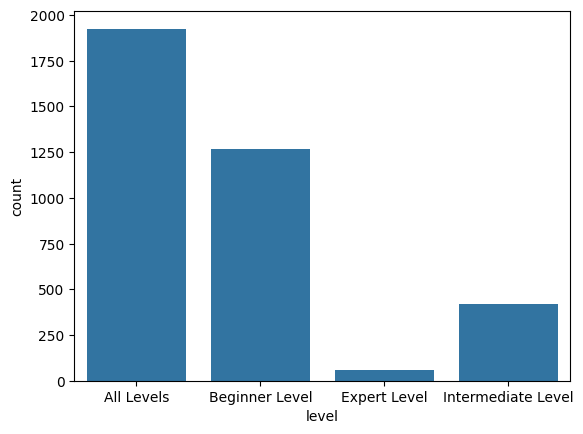

In [46]:
sns.barplot(x = "level", y = "count", data = x)

### Most Popular Courses as per the number of subscribers

In [51]:
x = df.sort_values(by = "num_subscribers", ascending = False).head(10)
x

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14T07:03:41Z,Web Development
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09T15:51:55Z,Web Development
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02T21:13:27Z,Web Development
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08T16:21:30Z,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08T22:28:36Z,Web Development
1896,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,False,0,101154,1042,95,Beginner Level,4.5,2012-06-15T17:00:33Z,Musical Instruments
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13T18:29:47Z,Web Development
2619,94430,Learn Javascript & JQuery From Scratch,https://www.udemy.com/learn-javascript-jquery-...,True,30,84897,2685,10,All Levels,2.0,2013-10-10T15:19:29Z,Web Development
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19T03:02:05Z,Web Development
3247,364426,JavaScript: Understanding the Weird Parts,https://www.udemy.com/understand-javascript/,True,175,79612,16976,85,All Levels,11.5,2015-03-12T23:19:54Z,Web Development


<Axes: xlabel='num_subscribers', ylabel='course_title'>

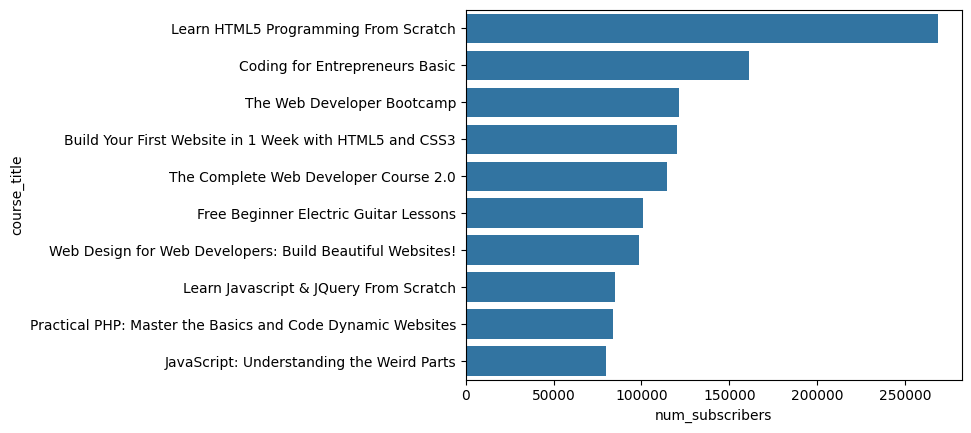

In [57]:
sns.barplot(x="num_subscribers", y="course_title", data=x)


### Does Price Affect the Number of Reviews?

<Axes: xlabel='price', ylabel='num_reviews'>

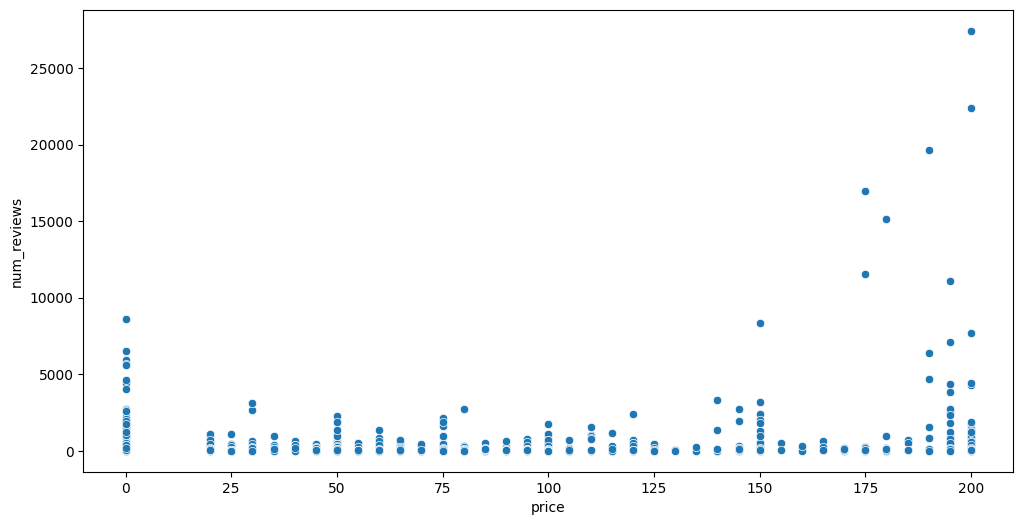

In [60]:
plt.figure(figsize=(12,6))  
sns.scatterplot(x="price", y="num_reviews", data=df)


###  Display Category-Wise Count of Posted Subjects [Year Wise] 

In [61]:
df["year"] = df["published_timestamp"].apply(lambda x : x.split("-")[0])


Text(0.5, 1.0, 'Number of Courses Subject-wise Over the Years')

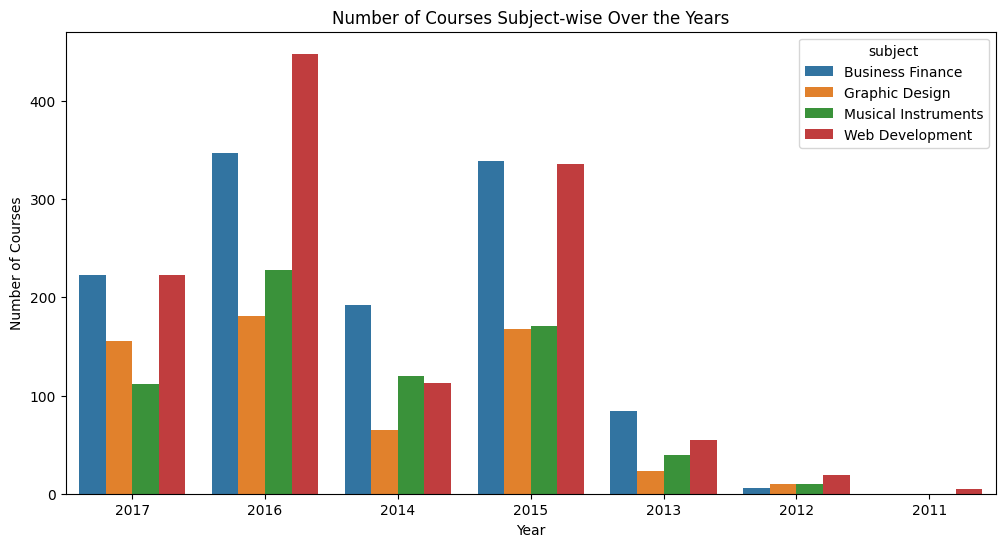

In [63]:
plt.figure(figsize=(12, 6))  # Set the figure size for better visibility
sns.countplot(x='year', hue='subject', data=df)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Subject-wise Over the Years')


In [64]:
# using group by
grouped_df = df.groupby(["year", "subject"]).size().reset_index(name="count")
grouped_df

,year,subject,count
0,2011,Web Development,5
1,2012,Business Finance,6
2,2012,Graphic Design,10
3,2012,Musical Instruments,10
4,2012,Web Development,19
5,2013,Business Finance,84
6,2013,Graphic Design,23
7,2013,Musical Instruments,39
8,2013,Web Development,55
9,2014,Business Finance,192
